<a href="https://colab.research.google.com/github/arupbh/LearnAI/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

In [ ]:
import pandas as pd
import csv

data_path = '/content/data/IMDB Dataset.csv'
df = pd.read_csv(data_path,
                 quoting=csv.QUOTE_MINIMAL,  # Try minimal quoting instead of QUOTE_ALL
                 escapechar='\\',            # Add escape character handling
                 on_bad_lines='skip',        # Keep this to skip problematic lines
                 engine='python')
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
# Convert to lowercase
df['review']=df['review'].str.lower()

In [ ]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [ ]:
# Remove HTML tags
import re
def remove_html_tags(text):
  pattern = re.compile('<.*>?')
  return pattern.sub(r'',text)

In [ ]:
df['review']=df['review'].apply(remove_html_tags)

In [ ]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me."

In [ ]:
# Remove_URL
def remove_url(text):
  pattern = re.compile('https?://\S+|www\.\S+')
  return str(pattern.sub(r'',text))

In [ ]:
df['review']=df['review'].apply(remove_url)

In [ ]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me."

In [ ]:
# Remove Punctuations
import string,time

string.punctuation
exclude = string.punctuation
exclude

def remove_punc2(text):
  return text.translate(str.maketrans('','',exclude))



In [ ]:
df['review'] = df['review'].apply(remove_punc2)

In [ ]:
# Chat_Conversation handle
chat_words={
    'AFAIK':'As far as i know',
    'AFK':'Away from keyboard',
    'ASAP':'As soon as possible',
    'FYI':'For your information',
    'BRB':'Be right back',
    'BTW':'By the way',
    'OMG':'Oh my god',
    'IMO':'In my opinion',
    'LOL':'Laugh out loud',
    'TTYL':'Talk to you later',
    'GTG':'Go to Go',
    'TTYT':'Talk to you tomorrow',
    'IDK':'I dont know',
    'TMI':'Too much Information',
    'IMHO':'In my humble opinion',
    'ICYMI':'In case you missed it',
    'FAQ':'Frequently asked question',
    'TGIF':'Thank god its friday',
    'FYA':'For your action',
}

In [ ]:
def chat_conversation(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
df['review'] = df['review'].apply(chat_conversation)

In [ ]:
df['review'].head(5)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [ ]:
# # Incorrect text handling
# from textblob import TextBlob
# #df['review'] = df['review'].apply(TextBlob)
# df['review'] = df['review'].apply(lambda x: TextBlob(x).correct())

!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

def fast_correct(text):
    if not isinstance(text, str):
        return text
    corrected = []
    for word in text.lower().split():
        fixed = spell.correction(word)
        corrected.append(fixed if fixed else word)
    return ' '.join(corrected)

In [ ]:
#df['review'] = df['review'].apply(fast_correct)

In [ ]:
# Remove Stop Words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# def remove_stopwords(text):
#    new_text = []
#    for word in text.split():
#      if word in stopwords.words('english'):
#        new_text.append('')
#      else:
#        new_text.append(word)
#    return " ".join(new_text)

stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word not in stop_words:
            new_text.append(word)
    return " ".join(new_text)

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df['review'].head(10)

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
5,probably alltime favorite movie story selfless...
6,sure would like see resurrection dated seahunt...
7,show amazing fresh innovative idea 70s first a...
8,encouraged positive comments film looking forw...
9,like original gut wrenching laughter like movi...


In [ ]:
#Emoji Removal
import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
print(emoji.demojize('python is 🔥'))

python is :fire:


In [ ]:
df['review']= df['review'].apply(remove_emoji)

In [ ]:
df['review'].head(10)

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
5,probably alltime favorite movie story selfless...
6,sure would like see resurrection dated seahunt...
7,show amazing fresh innovative idea 70s first a...
8,encouraged positive comments film looking forw...
9,like original gut wrenching laughter like movi...


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['review']=df['review'].apply(word_tokenize)

In [ ]:
df['review'].head(10)

,review
0,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,"[wonderful, little, production]"
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,..."
4,"[petter, matteis, love, time, money, visually,..."
5,"[probably, alltime, favorite, movie, story, se..."
6,"[sure, would, like, see, resurrection, dated, ..."
7,"[show, amazing, fresh, innovative, idea, 70s, ..."
8,"[encouraged, positive, comments, film, looking..."
9,"[like, original, gut, wrenching, laughter, lik..."


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemmatize_tokens(tokens):
    #tokens = word_tokenize(text)
    lemmatized = [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return ' '.join(lemmatized)



In [ ]:
df['review'] = df['review'].apply(lambda x:lemmatize_tokens(x))

In [ ]:
df['review'].head(10)

,review
0,one reviewers mention watch 1 oz episode youll...
1,wonderful little production
2,think wonderful way spend time hot summer week...
3,basically theres family little boy jake think ...
4,petter matteis love time money visually stun f...
5,probably alltime favorite movie story selfless...
6,sure would like see resurrection date seahunt ...
7,show amaze fresh innovative idea 70s first air...
8,encourage positive comment film look forward w...
9,like original gut wrench laughter like movie y...


In [ ]:
!pip install --upgrade gensim --user

In [ ]:
import numpy as np
import gensim #this file has word2vec architechture
import os

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
story = []
for filename in os.listdir('data'):
  if filename == '.ipynb_checkpoints':
    pass
  f = open(os.path.join('data', filename))
  corpus = f.read()
  raw_sent = sent_tokenize(corpus)
  for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [ ]:
story

[['review',
  'sentiment',
  'one',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  'oz',
  'episode',
  'you',
  'll',
  'be',
  'hooked'],
 ['they',
  'are',
  'right',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me',
  'br',
  'br',
  'the',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go'],
 ['trust',
  'me',
  'this',
  'is',
  'not',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid'],
 ['this',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs',
  'sex',
  'or',
  'violence'],
 ['its',
  'is',
  'hardcore',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word',
  'br',
  'br',
  'it',
  'is',
  'called',
  'oz',
  'as',
  'that',
  'is

In [ ]:
len(story)

526526

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [ ]:
model.build_vocab(story)

In [ ]:
model.epochs
model.corpus_count

526526

In [ ]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(42741958, 56132345)

Accuracy : 0.8
Precision: 0.8
Recall   : 0.79
F1-score : 0.79


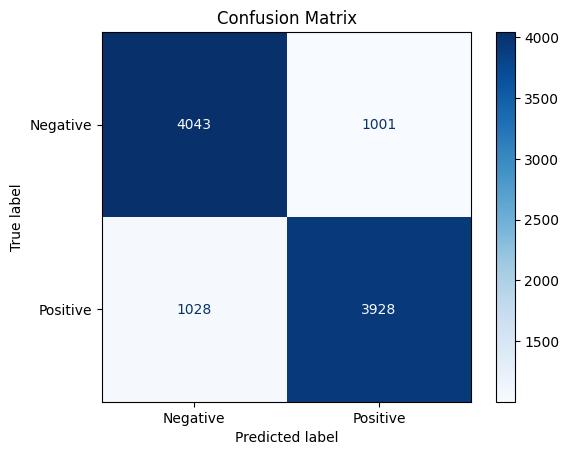

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

x = df['review']
y = df['sentiment']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Apply bag of words - Convert text to numeric features
cv = CountVectorizer(max_features=5000, stop_words='english')
x_train_bow = cv.fit_transform(x_train)   #.toarray()
x_test_bow = cv.transform(x_test)    #.toarray()

# Choose and train a model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_bow, y_train)

# Make predictions
y_pred = model.predict(x_test_bow)

# Calculate metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall    = recall_score(y_test, y_pred, pos_label='positive')
f1        = f1_score(y_test, y_pred, pos_label='positive')

print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1-score :", round(f1, 2))

# Generate and show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
